In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("D:\Downloads\heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()
Age , RestingBP,Cholesterol ,FastingBS, MaxHR ,Oldpeak, HeartDisease 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
def num_analysis(col):
    fig, ax=plt.subplots(1,2,figsize=(15,7))
    ax[0].hist(df[col])
    ax[1].boxplot(df[col])
    plt.title('distribution of' +col)
    plt.show()

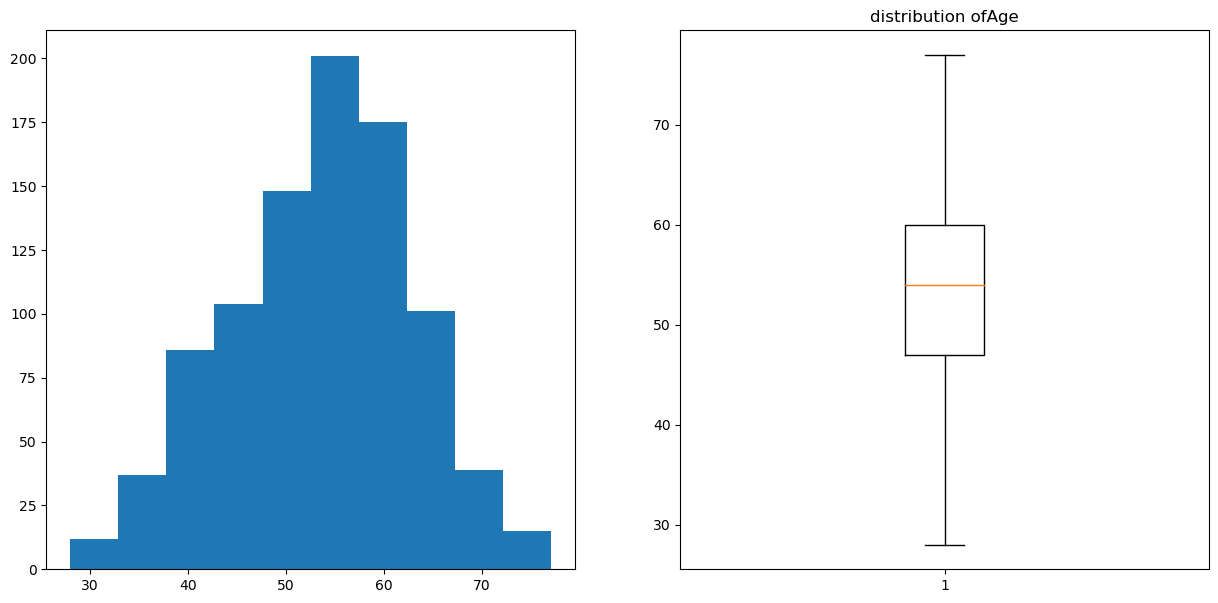

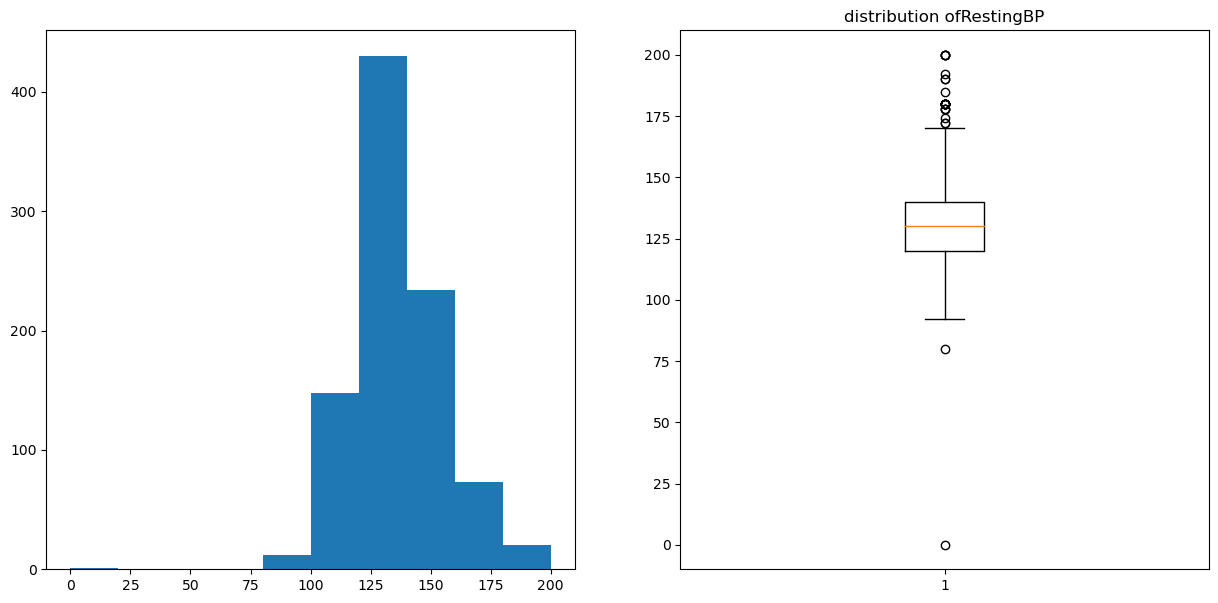

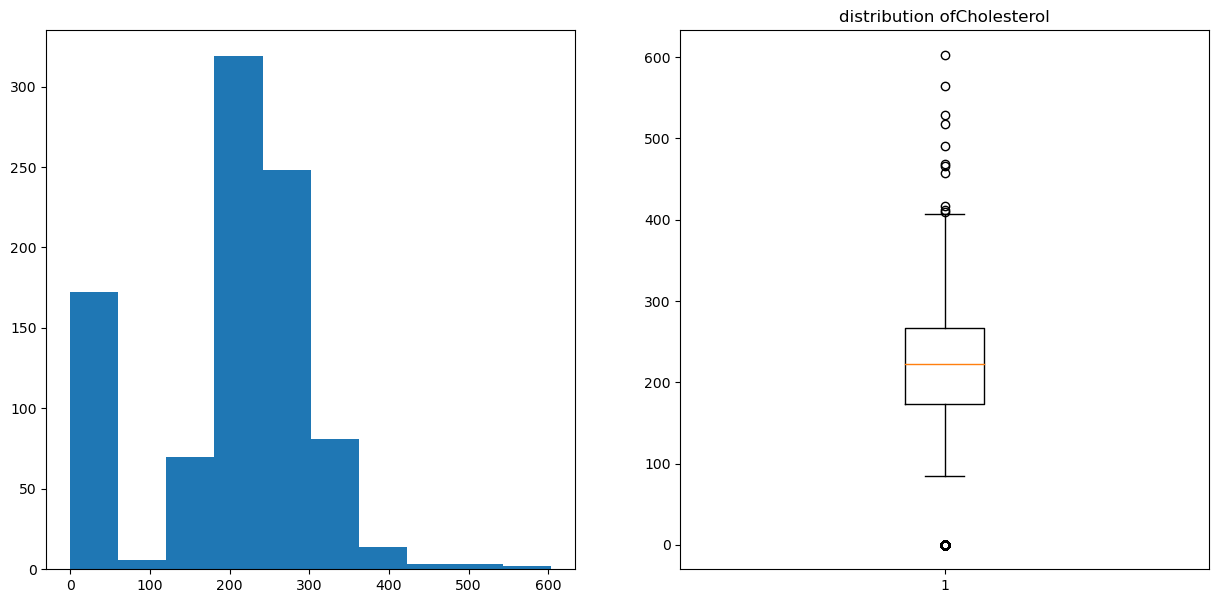

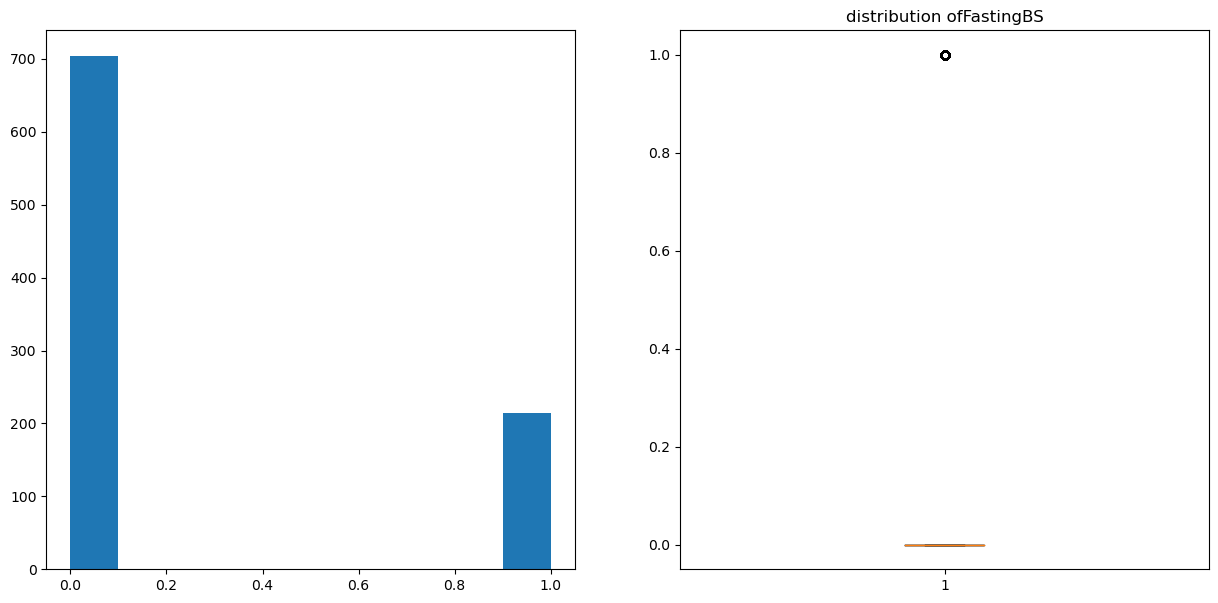

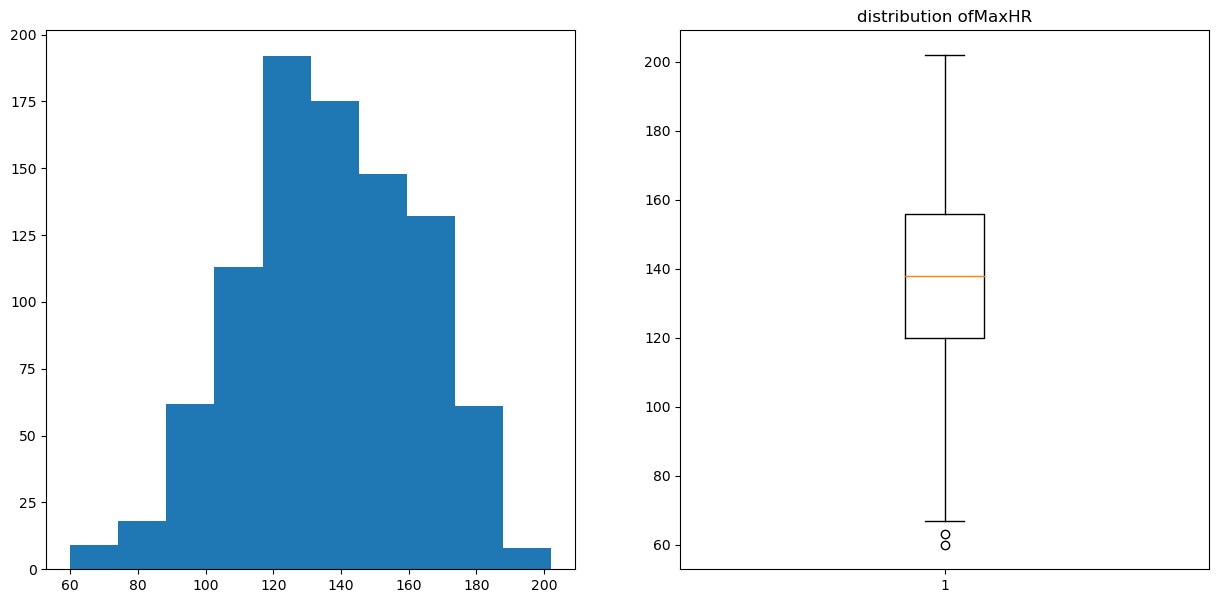

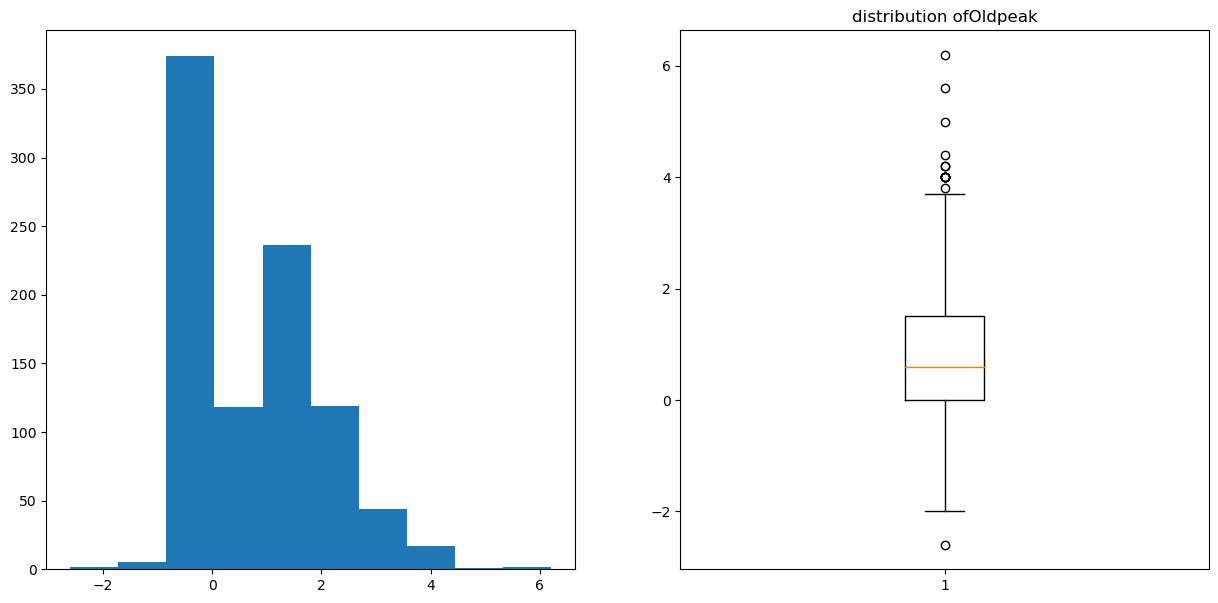

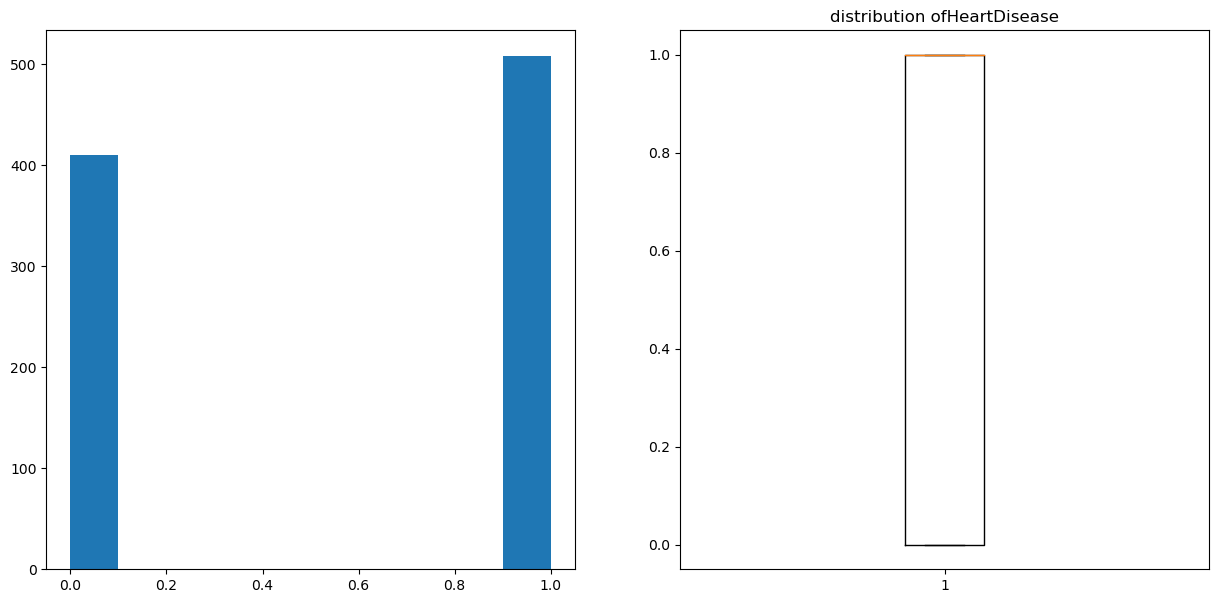

In [8]:
for i in df.columns:
    if df[i].dtype !='O':
        num_analysis(i)

In [11]:
def outlier_treatment(df,columns):
    for col in  columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        lf=q1-1.5*iqr
        uf=q3+1.5*iqr
        outlier_condition= (df[col]<lf) | (df[col]>uf)
        df.loc[outlier_condition,col]=df[col].median()
        
    return df
columns=['Age' , 'RestingBP','Cholesterol' ,'FastingBS', 'MaxHR' ,'Oldpeak', 'HeartDisease' ]  

In [12]:
data= outlier_treatment(df, columns)

In [13]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,0,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [15]:
import matplotlib.pyplot as plt
def num_analysis(col):
    fig, ax=plt.subplots(1,2,figsize=(15,7))
    ax[0].hist(data[col])
    ax[1].boxplot(data[col])
    plt.title('distribution of' +col)
    plt.show()

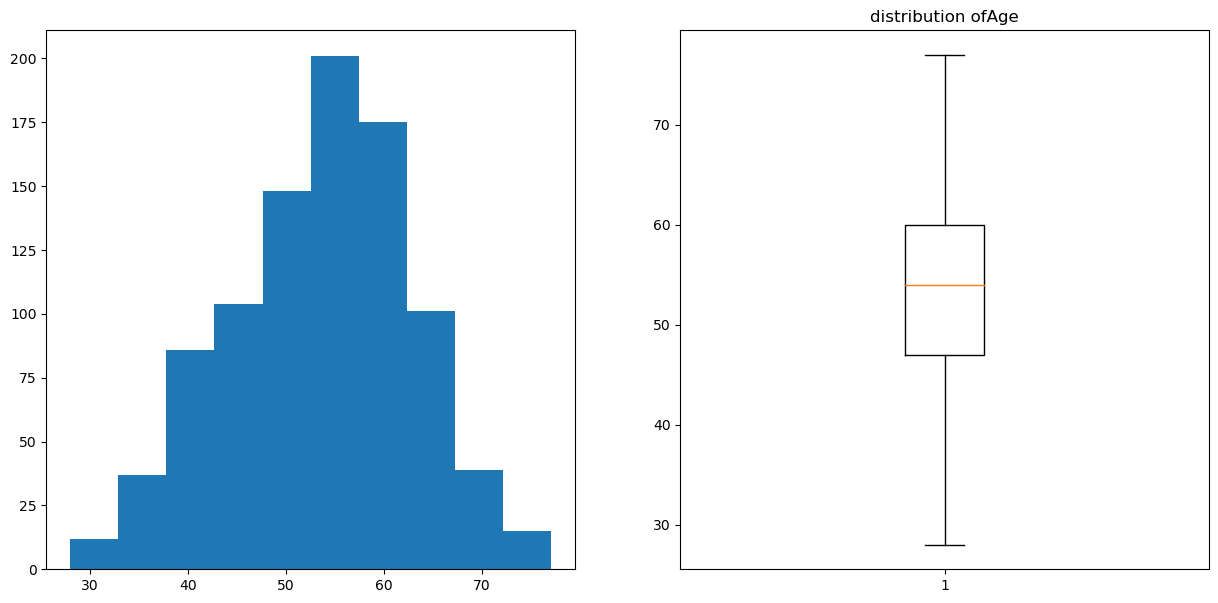

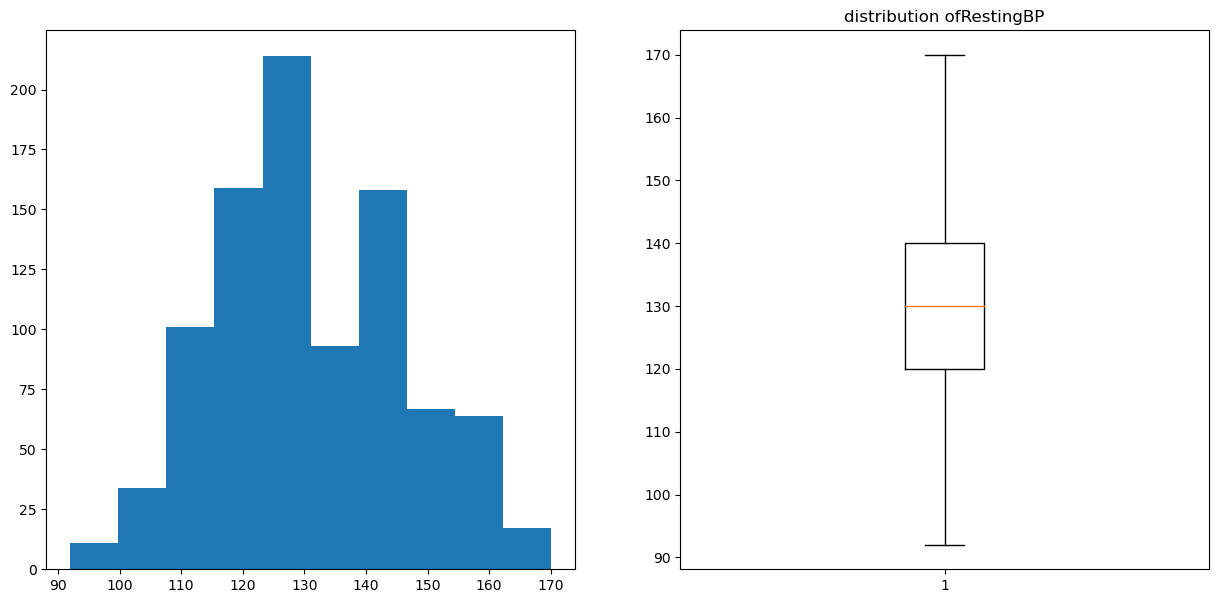

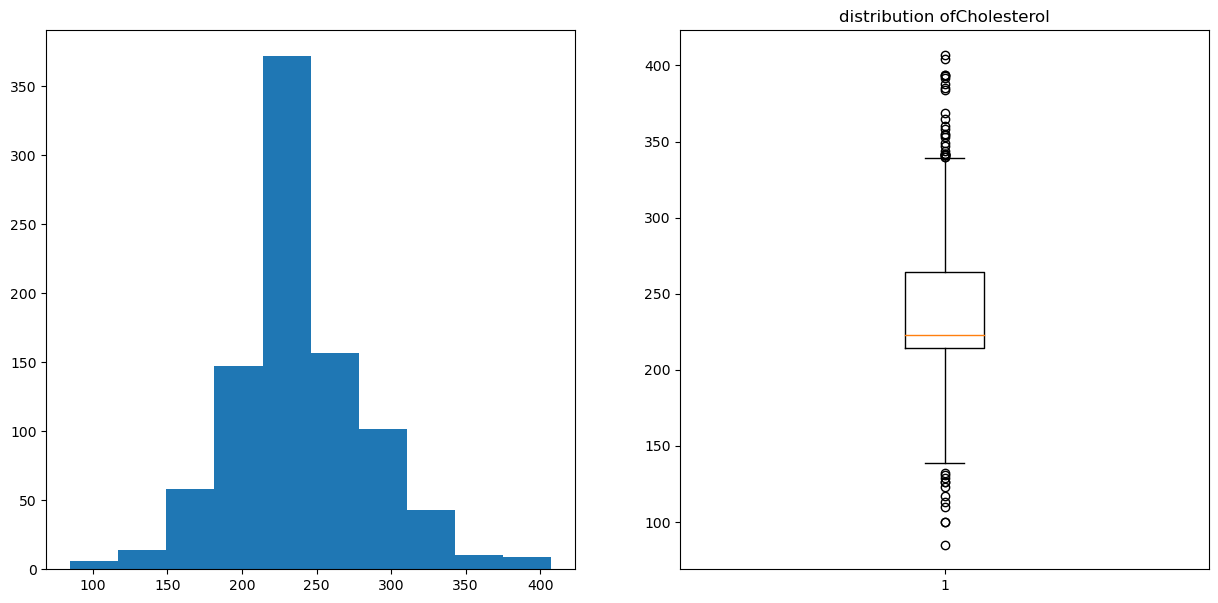

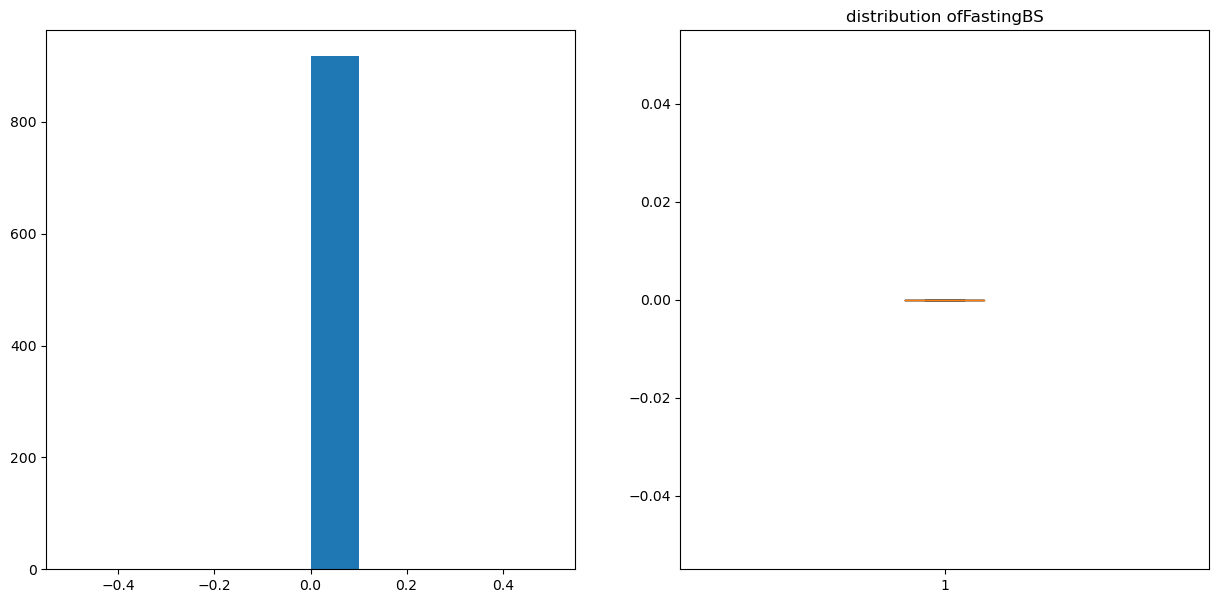

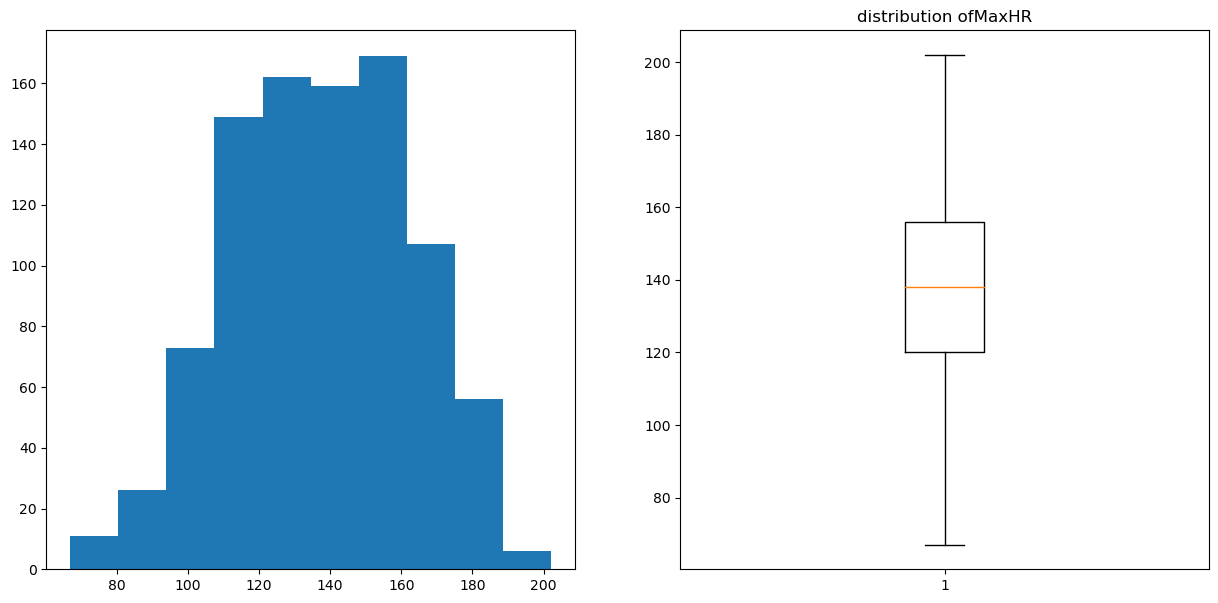

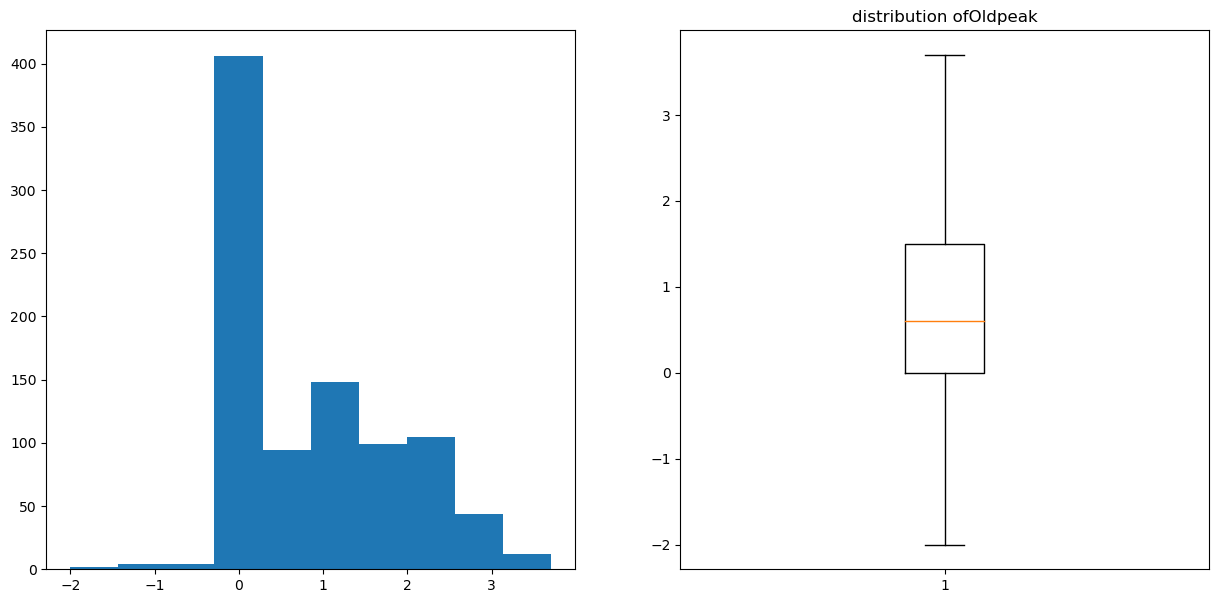

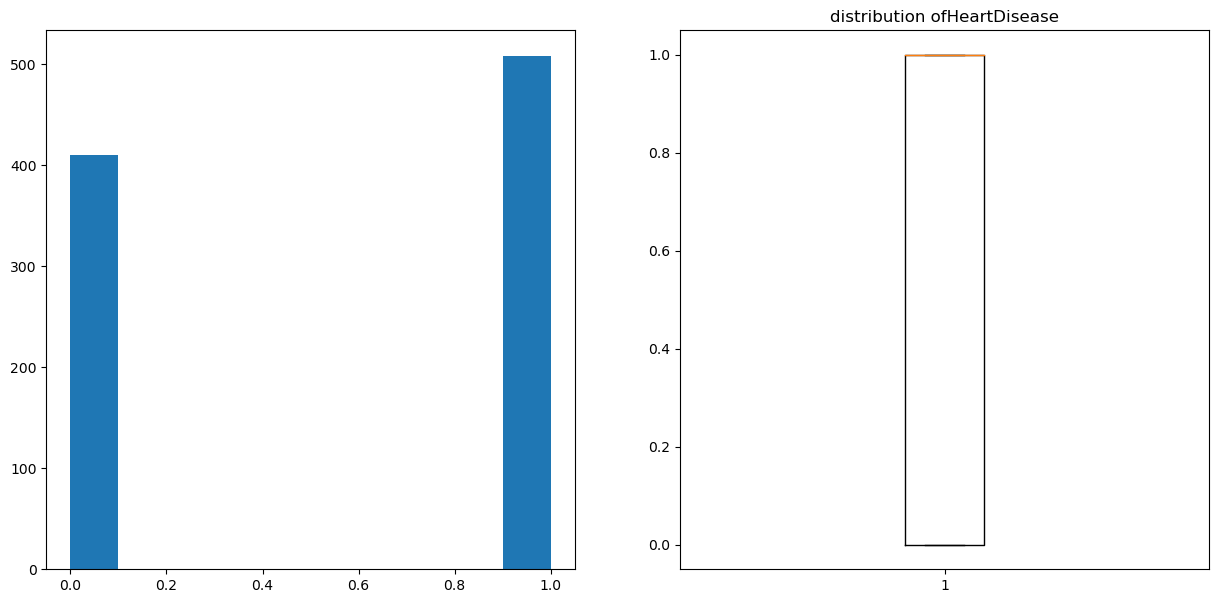

In [16]:
for i in data.columns:
    if data[i].dtype !='O':
        num_analysis(i)

In [17]:
q1= data['Cholesterol'].quantile(0.25)
q3= data['Cholesterol'].quantile(0.75)
iqr= q3-q1
lf= q1-1.5*iqr
uf= q3+1.5*iqr
print(lf, uf)

139.0 339.0


In [18]:
data.loc[data['Cholesterol']<139, 'Cholesterol']= data['Cholesterol'].median()

In [21]:
data.loc[data['Cholesterol']>325, 'Cholesterol']= data['Cholesterol'].median()

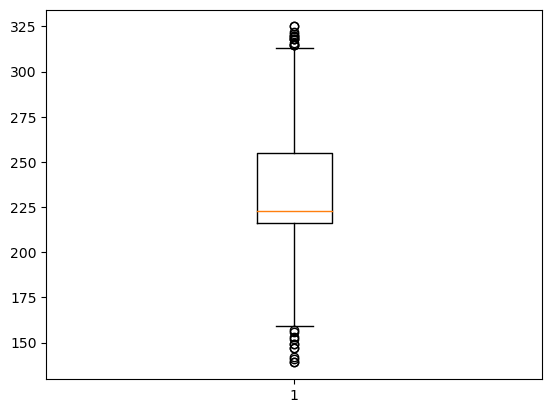

In [22]:
plt.boxplot(data['Cholesterol'])
plt.show()

In [23]:
from sklearn.preprocessing import OneHotEncoder
# Create an instance of the OneHotEncoder
def encode_ohe(col1):
    encoder = OneHotEncoder()
    encoded_data = encoder.fit_transform(data[[col1]])
    encoded_array = encoded_data.toarray()
    feature_names = encoder.get_feature_names_out()
    d1= pd.DataFrame(encoded_array, columns= feature_names)
    d1= d1.iloc[:, 1:]
    return d1

In [26]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [25]:
num=['Age' , 'RestingBP','Cholesterol' ,'FastingBS', 'MaxHR' ,'Oldpeak', 'HeartDisease']

In [27]:
numeric= data.loc[:, num]
numeric

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,0,141,3.4,1
915,57,130,223,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [28]:
Sex= encode_ohe('Sex')
ChestPainType= encode_ohe('ChestPainType')
RestingECG = encode_ohe('RestingECG')
ExerciseAngina =  encode_ohe('ExerciseAngina')
ST_Slope= encode_ohe('ST_Slope')


In [29]:
df=pd.concat([Sex,ChestPainType,RestingECG, ExerciseAngina,ST_Slope,numeric], axis=1)
df

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,40,140,289,0,172,0.0,0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49,160,180,0,156,1.0,1
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,37,130,283,0,98,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,48,138,214,0,108,1.5,1
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,45,110,264,0,132,1.2,1
914,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,68,144,193,0,141,3.4,1
915,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,57,130,223,0,115,1.2,1
916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,57,130,236,0,174,0.0,1


In [33]:
X= df.loc[:, df.columns!= 'HeartDisease']
y= df.loc[:,  'HeartDisease']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=1)

In [36]:
X_train.shape

(734, 15)

In [37]:
X_test.shape

(184, 15)

In [38]:
y_train.shape

(734,)

In [39]:
y_test.shape

(184,)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
l= LogisticRegression()
l.fit(X_train, y_train)

C:\Users\SHRADDHA\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred_train= l.predict(X_train)

In [43]:
from sklearn import metrics

In [44]:
metrics.accuracy_score(y_pred_train, y_train)

0.8474114441416893

In [45]:
print(metrics.confusion_matrix(y_train, y_pred_train))

[[275  61]
 [ 51 347]]


In [46]:
y_test_pred=l.predict(X_test)

In [47]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[ 64  10]
 [  9 101]]


In [48]:
metrics.accuracy_score(y_test, y_test_pred)

0.8967391304347826

# SVC

In [50]:
from sklearn.svm import SVC
sv_classifier= SVC()
sv_classifier.fit(X_train, y_train)

SVC()

In [51]:
y_train_pred_sv= sv_classifier.predict(X_train)

In [52]:
metrics.accuracy_score(y_train_pred_sv, y_train)

0.6866485013623979

In [53]:
print(metrics.confusion_matrix(y_train, y_train_pred_sv))

[[199 137]
 [ 93 305]]


In [54]:
print(metrics.classification_report(y_train, y_train_pred_sv))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       336
           1       0.69      0.77      0.73       398

    accuracy                           0.69       734
   macro avg       0.69      0.68      0.68       734
weighted avg       0.69      0.69      0.68       734



In [55]:
y_test_pred=sv_classifier.predict(X_test)

In [56]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[45 29]
 [26 84]]


In [57]:
metrics.accuracy_score(y_test, y_test_pred)

0.7010869565217391

In [58]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        74
           1       0.74      0.76      0.75       110

    accuracy                           0.70       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.70      0.70      0.70       184



# SINCE Logistic Regression is showing good accuracy so Fitting logistic Regression model to Dataset